In [56]:
import numpy as np
import awkward as ak
import uproot
import matplotlib.pyplot as plt
from matplotlib import cm


In [57]:
root_file_dir= '~/Desktop/ROOT_files/'
file1= uproot.open(root_file_dir + 'flat_caf_0-833995dc-14a2-47e7-9a95-91e25102b7ef.root:recTree;29')
file2= uproot.open(root_file_dir + 'flat_caf_1-1637ea75-449f-467f-abd7-9e2f4f9710a7.root:recTree;31')
file3= uproot.open(root_file_dir + 'flat_caf_2-16432aaf-a139-4cb0-8c09-26f5af8c457f.root:recTree;31')
file4= uproot.open(root_file_dir + 'flat_caf_3-1ffa5d5d-a703-4c89-be04-dd5e6d458981.root:recTree;31')
file5= uproot.open(root_file_dir + 'flat_caf_4-d0f08994-a5a3-4420-8600-616832f5adbb.root:recTree;31')

In [58]:
file1.keys(filter_name='*')

['rec.crt_hits..length',
 'rec.crt_hits.pe',
 'rec.crt_hits.plane',
 'rec.crt_hits.position.x',
 'rec.crt_hits.position.y',
 'rec.crt_hits.position.z',
 'rec.crt_hits.position_err.x',
 'rec.crt_hits.position_err.y',
 'rec.crt_hits.position_err.z',
 'rec.crt_hits.t0',
 'rec.crt_hits.t1',
 'rec.crt_hits.time',
 'rec.crt_tracks..length',
 'rec.crt_tracks.hita.pe',
 'rec.crt_tracks.hita.plane',
 'rec.crt_tracks.hita.position.x',
 'rec.crt_tracks.hita.position.y',
 'rec.crt_tracks.hita.position.z',
 'rec.crt_tracks.hita.position_err.x',
 'rec.crt_tracks.hita.position_err.y',
 'rec.crt_tracks.hita.position_err.z',
 'rec.crt_tracks.hita.t0',
 'rec.crt_tracks.hita.t1',
 'rec.crt_tracks.hita.time',
 'rec.crt_tracks.hitb.pe',
 'rec.crt_tracks.hitb.plane',
 'rec.crt_tracks.hitb.position.x',
 'rec.crt_tracks.hitb.position.y',
 'rec.crt_tracks.hitb.position.z',
 'rec.crt_tracks.hitb.position_err.x',
 'rec.crt_tracks.hitb.position_err.y',
 'rec.crt_tracks.hitb.position_err.z',
 'rec.crt_tracks.hitb.

In [59]:
start= file1.arrays(['x0','y0','z0'], aliases={'x0':'rec.reco.trk.start.x', 
                                     'y0':'rec.reco.trk.start.y',
                                     'z0':'rec.reco.trk.start.z'})
end= file1.arrays(['xf','yf','zf'], aliases={'xf':'rec.reco.trk.end.x', 
                                    'yf':'rec.reco.trk.end.y',
                                     'zf':'rec.reco.trk.end.z'})

In [60]:
def get_cut(start, end):
    cut_xf= (np.absolute(end['xf'])<200)    
    cut_yf= (np.absolute(end['yf'])<200)
    cut_zf0= (end['zf'])>0
    cut_zf1= (end['zf'])<500

    cut_x0= (np.absolute(start['x0'])<200) 
    cut_y0= (np.absolute(start['y0'])<200)
    cut_z00= (start['z0'])>0
    cut_z01= (start['z0'])<500

    cut_full= cut_xf & cut_yf & cut_zf0 & cut_zf1 & cut_x0 & cut_y0 & cut_z00 & cut_z01 
    cut= np.full(ak.num(cut_full, axis=0), True)

    for i in range(ak.num(cut_full, axis=0)):
        for j in range(ak.num(cut_full)[i]):
            if cut_full[i][j]== False:
                cut[i]= False

    return cut, cut_full

In [61]:
cut= get_cut(start, end)

The ratio of Data/Mc is 1.3200671797669925


<Figure size 640x480 with 0 Axes>

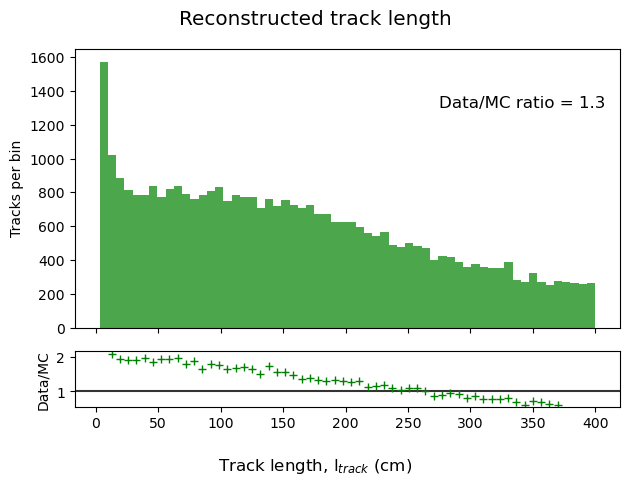

In [62]:
truth_length= ak.flatten(file1['rec.reco.trk.truth.p.length'].array()).to_numpy()
reco_length= ak.flatten(file1['rec.reco.trk.len'].array()).to_numpy()

truth_length= np.delete(truth_length, np.where((truth_length<3) | (truth_length>400)))
reco_length= np.delete(reco_length, np.where((reco_length<3) | (reco_length>400)))

h_truth,bins,_= plt.hist(truth_length, bins=60, color='r', alpha=0.3)
x_axis= bins[:-1]+bins[0]
h_reco,_,_= plt.hist(reco_length, bins=60, color= 'g', alpha=0.3)
plt.clf()
fig, (ax1,ax2)= plt.subplots(2,1, sharex= True, gridspec_kw={'height_ratios': [5, 1]})
h_reco,_,_= ax1.hist(reco_length[1:], bins=60, color= 'g', alpha= 0.7)
ax2.axhline(1, alpha= 0.8, c='k')
ax2.errorbar(x_axis[1:-4], (h_reco/h_truth)[1:-4], fmt= 'g+')
fig.suptitle('Reconstructed track length', size= 'x-large')
fig.supxlabel(r'Track length, l$_{track}$ (cm)')
ax1.set_ylabel('Tracks per bin')
ax2.set_ylabel('Data/MC')
fig.tight_layout()
# ax1.text(275, 1400, 'Tracks > 25 cm', family='sans-serif', size= 'large')
ax1.text(275,1300, f'Data/MC ratio = {np.average(h_reco/h_truth):.2}', family='sans-serif', size= 'large')
print(f'The ratio of Data/Mc is {np.average(h_reco/h_truth)}')

The ratio of Data/Mc is 0.27740548192661546


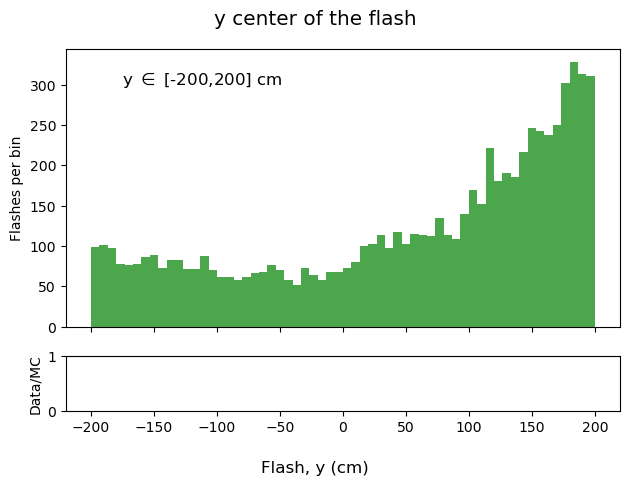

In [63]:
# truth_flashy= ak.flatten(file1['rec.reco.trk.truth.p.length'].array()).to_numpy()
reco_flashy= ak.flatten(file1['rec.slc.fmatch.chargeCenter.y'].array()).to_numpy()

# truth_length= np.delete(truth_length, np.where((truth_length<3) | (truth_length>400)))
reco_flashy= np.delete(reco_flashy, np.where((reco_flashy<-200) | (reco_flashy>200)))

# h_truth,bins,_= plt.hist(truth_length, bins=60, color='r', alpha=0.3)
# x_axis= bins[:-1]+bins[0]
# h_reco,_,_= plt.hist(reco_length, bins=60, color= 'g', alpha=0.3)
# plt.clf()
fig, (ax1,ax2)= plt.subplots(2,1, sharex= True, gridspec_kw={'height_ratios': [5, 1]})
h_reco,_,_= ax1.hist(reco_flashy, bins=60, color= 'g', alpha= 0.7)
ax2.axhline(1, alpha= 0.8, c='k')
# ax2.errorbar(x_axis[1:-4], (h_reco/h_truth)[1:-4], fmt= 'g+')
fig.suptitle('y center of the flash', size= 'x-large')
fig.supxlabel(r'Flash, y (cm)')
ax1.set_ylabel('Flashes per bin')
ax2.set_ylabel('Data/MC')
fig.tight_layout()
ax1.text(-175, 300, r'y $\in$ [-200,200] cm', family='sans-serif', size= 'large')
# ax1.text(-175,250, f'Data/MC ratio = {np.average(h_reco/h_truth):.2}', family='sans-serif', size= 'large')
print(f'The ratio of Data/Mc is {np.average(h_reco/h_truth)}')

The ratio of Data/Mc is 0.27423404652861083


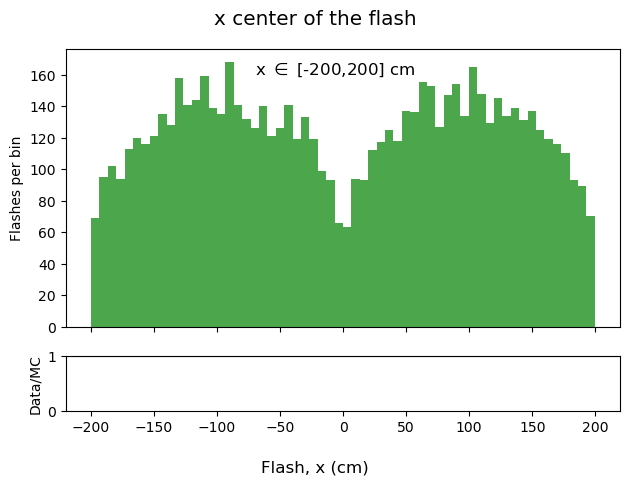

In [64]:
# truth_flashy= ak.flatten(file1['rec.reco.trk.truth.p.length'].array()).to_numpy()
reco_flashy= ak.flatten(file1['rec.slc.fmatch.chargeCenter.x'].array()).to_numpy()

# truth_length= np.delete(truth_length, np.where((truth_length<3) | (truth_length>400)))
reco_flashy= np.delete(reco_flashy, np.where((reco_flashy<-200) | (reco_flashy>200)))

# h_truth,bins,_= plt.hist(truth_length, bins=60, color='r', alpha=0.3)
# x_axis= bins[:-1]+bins[0]
# h_reco,_,_= plt.hist(reco_length, bins=60, color= 'g', alpha=0.3)
# plt.clf()
fig, (ax1,ax2)= plt.subplots(2,1, sharex= True, gridspec_kw={'height_ratios': [5, 1]})
h_reco,_,_= ax1.hist(reco_flashy, bins=60, color= 'g', alpha= 0.7)
ax2.axhline(1, alpha= 0.8, c='k')
# ax2.errorbar(x_axis[1:-4], (h_reco/h_truth)[1:-4], fmt= 'g+')
fig.suptitle('x center of the flash', size= 'x-large')
fig.supxlabel(r'Flash, x (cm)')
ax1.set_ylabel('Flashes per bin')
ax2.set_ylabel('Data/MC')
fig.tight_layout()
ax1.text(-70, 160, r'x $\in$ [-200,200] cm', family='sans-serif', size= 'large')
# ax1.text(-175,250, f'Data/MC ratio = {np.average(h_reco/h_truth):.2}', family='sans-serif', size= 'large')
print(f'The ratio of Data/Mc is {np.average(h_reco/h_truth)}')

The ratio of Data/Mc is 0.27233751634997233


<Figure size 640x480 with 0 Axes>

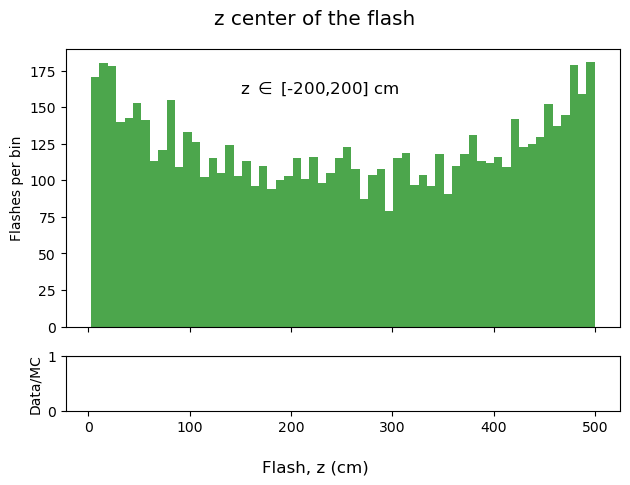

In [65]:
# truth_flashy= ak.flatten(file1['rec.reco.trk.truth.p.length'].array()).to_numpy()
reco_flashy= ak.flatten(file1['rec.slc.fmatch.chargeCenter.z'].array()).to_numpy()

truth_length= np.delete(truth_length, np.where((truth_length<3) | (truth_length>400)))
reco_flashy= np.delete(reco_flashy, np.where((reco_flashy<0) | (reco_flashy>500)))

h_truth,bins,_= plt.hist(truth_length, bins=60, color='r', alpha=0.3)
x_axis= bins[:-1]+bins[0]
h_reco,_,_= plt.hist(reco_length, bins=60, color= 'g', alpha=0.3)
plt.clf()
fig, (ax1,ax2)= plt.subplots(2,1, sharex= True, gridspec_kw={'height_ratios': [5, 1]})
h_reco,_,_= ax1.hist(reco_flashy, bins=60, color= 'g', alpha= 0.7)
ax2.axhline(1, alpha= 0.8, c='k')
# ax2.errorbar(x_axis[1:-4], (h_reco/h_truth)[1:-4], fmt= 'g+')
fig.suptitle('z center of the flash', size= 'x-large')
fig.supxlabel(r'Flash, z (cm)')
ax1.set_ylabel('Flashes per bin')
ax2.set_ylabel('Data/MC')
fig.tight_layout()
ax1.text(150, 160, r'z $\in$ [-200,200] cm', family='sans-serif', size= 'large')
# ax1.text(-175,250, f'Data/MC ratio = {np.average(h_reco/h_truth):.2}', family='sans-serif', size= 'large')
print(f'The ratio of Data/Mc is {np.average(h_reco/h_truth)}')

The ratio of Data/Mc is 1.2213189089281984


'rec.reco.trk.truth.p.end.x'

<Figure size 640x480 with 0 Axes>

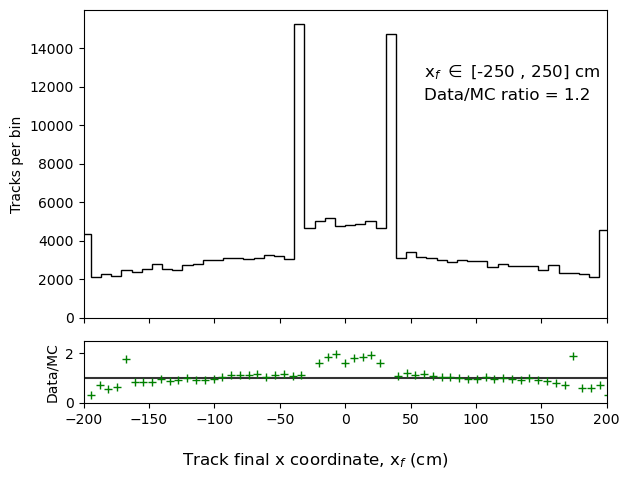

In [66]:
truth_length= ak.flatten(file1['rec.reco.trk.truth.p.end.x'].array()).to_numpy()
reco_length= ak.flatten(file1['rec.reco.trk.end.x'].array()).to_numpy()

truth_length= np.delete(truth_length, np.where((truth_length<-250) | (truth_length>250)))
reco_length= np.delete(reco_length, np.where((reco_length<-250) | (reco_length>250)))

truth_length= np.concatenate([truth_length, truth_length, truth_length, truth_length, truth_length])
reco_length= np.concatenate([reco_length, reco_length, reco_length, reco_length, reco_length])

h_truth,bins,_= plt.hist(truth_length, bins=60, color='r', alpha=0.3)
h_reco,_,_= plt.hist(reco_length, bins=60, color= 'g', alpha=0.3)
plt.clf()
fig, (ax1,ax2)= plt.subplots(2,1, sharex= True, gridspec_kw={'height_ratios': [5, 1]})
h_reco,_,_= ax1.hist(reco_length, bins=60, color= 'k', histtype=u'step')
x_axis= bins[:-1]+ (bins[1]-bins[0])
ax2.axhline(1, alpha= 0.8, c='k')
ax2.errorbar(x_axis, (h_reco/h_truth), fmt= 'g+')
# fig.suptitle('Reconstructed end x coordinate', size= 'x-large')
fig.supxlabel(r'Track final x coordinate, x$_{f}$ (cm)')
ax1.set_ylabel('Tracks per bin')
ax2.set_ylabel('Data/MC')
ax1.set_xlim(-200,200)
ax2.set_ylim(0,2.5)
fig.tight_layout()
ax1.text(60, 12500,r'x$_f$ $\in$ [-250 , 250] cm', family='sans-serif', size= 'large')
ax1.text(60,11300, f'Data/MC ratio = {np.average(h_reco/h_truth):.2}', family='sans-serif', size= 'large')
print(f'The ratio of Data/Mc is {np.average(h_reco/h_truth)}')
'rec.reco.trk.truth.p.end.x'

The ratio of Data/Mc is 8.324389082732464


'rec.reco.trk.truth.p.end.x'

<Figure size 640x480 with 0 Axes>

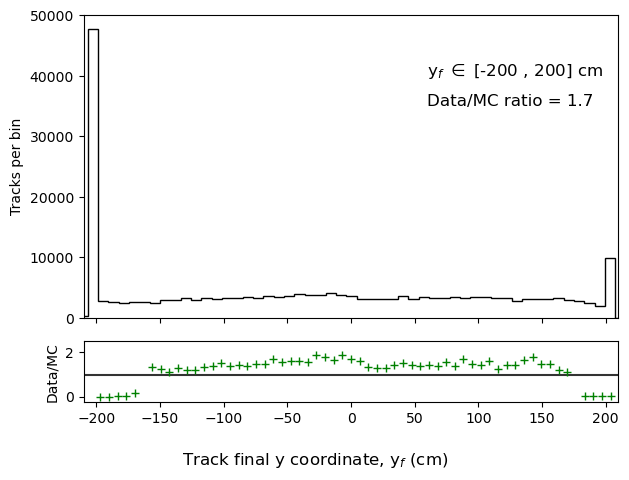

In [71]:
truth_length= ak.flatten(file1['rec.reco.trk.truth.p.end.y'].array()).to_numpy()
reco_length= ak.flatten(file1['rec.reco.trk.end.y'].array()).to_numpy()

truth_length= np.delete(truth_length, np.where((truth_length<-250) | (truth_length>250)))
reco_length= np.delete(reco_length, np.where((reco_length<-250) | (reco_length>250)))



h_truth,bins,_= plt.hist(truth_length, bins=60, color='r', alpha=0.3)
h_reco,_,_= plt.hist(reco_length, bins=60, color= 'g', alpha=0.3)
mcratio= (h_reco/h_truth)
mcratioav= np.average(h_reco/h_truth)
plt.clf()

truth_length= np.concatenate([truth_length, truth_length, truth_length, truth_length, truth_length])
reco_length= np.concatenate([reco_length, reco_length, reco_length, reco_length, reco_length])
fig, (ax1,ax2)= plt.subplots(2,1, sharex= True, gridspec_kw={'height_ratios': [5, 1]})
h_reco,_,_= ax1.hist(reco_length, bins=60, color= 'k', histtype=u'step')
x_axis= bins[:-1]+ (bins[1]-bins[0])
ax2.axhline(1, alpha= 0.8, c='k')
ax2.errorbar(x_axis, (mcratio), fmt= 'g+')
# fig.suptitle('Reconstructed end y coordinate', size= 'x-large')
fig.supxlabel(r'Track final y coordinate, y$_{f}$ (cm)')
ax1.set_ylabel('Tracks per bin')
ax2.set_ylabel('Data/MC')
ax2.set_ylim(-0.25,2.5)
ax2.set_xlim(-210,210)
fig.tight_layout()
ax1.text(60, 40000, r'y$_f$ $\in$ [-200 , 200] cm', family='sans-serif', size= 'large')
ax1.text(60,35000, f'Data/MC ratio = {mcratioav:.2}', family='sans-serif', size= 'large')
print(f'The ratio of Data/Mc is {np.average(h_reco/h_truth)}')
'rec.reco.trk.truth.p.end.x'

The ratio of Data/Mc is 1.1346604327380598


'rec.reco.trk.truth.p.end.x'

<Figure size 640x480 with 0 Axes>

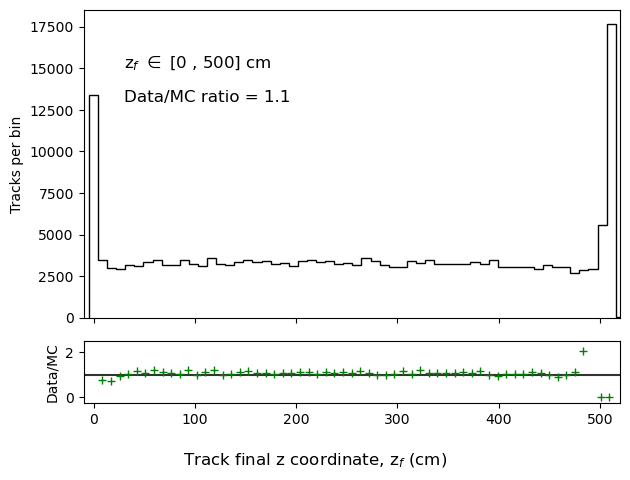

In [75]:
truth_length= ak.flatten(file1['rec.reco.trk.truth.p.end.z'].array()).to_numpy()
reco_length= ak.flatten(file1['rec.reco.trk.end.z'].array()).to_numpy()

truth_length= np.delete(truth_length, np.where((truth_length<-5) | (truth_length>550)))
reco_length= np.delete(reco_length, np.where((reco_length<-5) | (reco_length>550)))

truth_length= np.concatenate([truth_length, truth_length, truth_length, truth_length, truth_length])
reco_length= np.concatenate([reco_length, reco_length, reco_length, reco_length, reco_length])

h_truth,bins,_= plt.hist(truth_length, bins=60, color='r', alpha=0.3)
h_reco,_,_= plt.hist(reco_length, bins=60, color= 'g', alpha=0.3)
plt.clf()
fig, (ax1,ax2)= plt.subplots(2,1, sharex= True, gridspec_kw={'height_ratios': [5, 1]})
h_reco,_,_= ax1.hist(reco_length, bins=60,  color= 'k', histtype=u'step')
x_axis= bins[:-1]+ (bins[1]-bins[0])
ax2.axhline(1, alpha= 0.8, c='k')
ax2.errorbar(x_axis, (h_reco/h_truth), fmt= 'g+')
# fig.suptitle('Reconstructed end z coordinate', size= 'x-large')
fig.supxlabel(r'Track final z coordinate, z$_{f}$ (cm)')
ax1.set_ylabel('Tracks per bin')
ax2.set_ylabel('Data/MC')
ax2.set_ylim(-0.25,2.5)
ax1.set_xlim(-10,520)
fig.tight_layout()
ax1.text(30, 15000, r'z$_f$ $\in$ [0 , 500] cm', family='sans-serif', size= 'large')
ax1.text(30,13000, f'Data/MC ratio = {np.average(h_reco/h_truth):.2}', family='sans-serif', size= 'large')
print(f'The ratio of Data/Mc is {np.average(h_reco/h_truth)}')
'rec.reco.trk.truth.p.end.x'

The ratio of Data/Mc is 1.1346604327380598
[ 18.18699187   1.55228398 285.26470588   0.69887077]


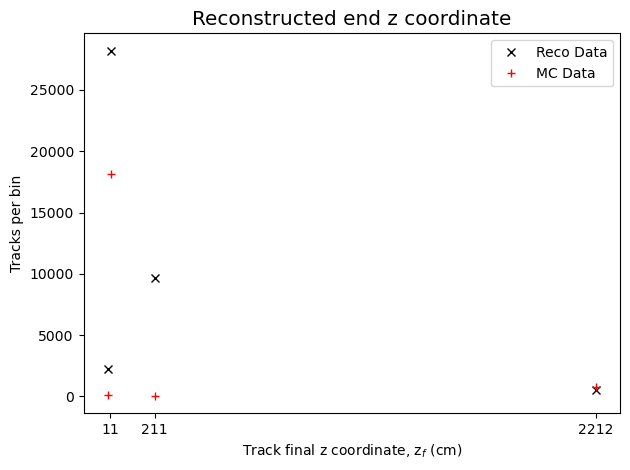

In [69]:
truth_length= ak.flatten(file1['rec.reco.trk.truth.p.pdg'].array()).to_numpy()
reco_length= ak.flatten(file1['rec.reco.trk.dazzle.pdg'].array()).to_numpy()

truth_length= np.delete(truth_length, np.where((truth_length<0) | (truth_length>20000)))
reco_length= np.delete(reco_length, np.where((reco_length<0) | (reco_length>20000)))


reco_amount= np.unique(reco_length)
reco_num= np.array([np.count_nonzero(reco_length== i) for i in reco_amount])
truth_amount= np.unique(truth_length)
truth_num= np.array([np.count_nonzero(truth_length== i) for i in truth_amount])
plt.errorbar(reco_amount, reco_num, fmt='kx', label= 'Reco Data')
plt.xticks([11,211,2212])
plt.errorbar(reco_amount,np.delete(truth_num,2), fmt= 'r+', label= 'MC Data')
plt.title('Reconstructed end z coordinate', size= 'x-large')
plt.xlabel(r'Track final z coordinate, z$_{f}$ (cm)')
plt.ylabel('Tracks per bin')
plt.tight_layout()
plt.legend()
# ax1.text(1500, 25000, 'Tracks > 25 cm', family='sans-serif', size= 'large')
# ax1.text(1500,23000, f'Data/MC ratio = {np.average(h_reco/h_truth):.2}', family='sans-serif', size= 'large')
print(f'The ratio of Data/Mc is {np.average(h_reco/h_truth)}')
print(reco_num/np.delete(truth_num,2))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 

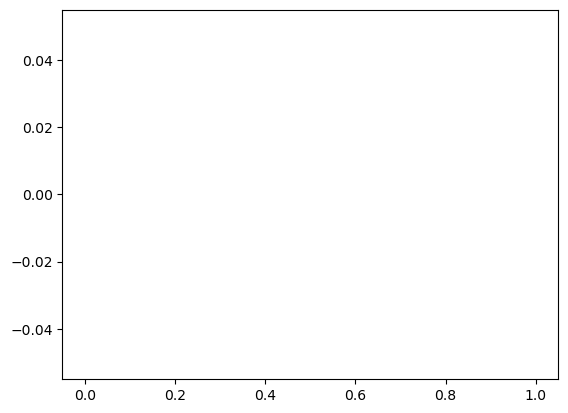

In [70]:
plt.hist(ak.ravel(file1['rec.reco.trk.calo.2.ke']), bins=100)